#### Importação de libs

In [1]:
!pip install pulp
!pip install latexify-py
import math
import latexify
import pulp
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.2 MB 7.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Exercício 4

# Modelagem

### Quais as variáveis de decisão?

####`x1`=> Freqüência semanal de A
####`x2`=> Freqüência semanal de B

### Qual a função objetivo?
#### Numero de telespectadores Maximização

*   Lucro de A 30000
*   Lucro de B 10000




In [2]:
@latexify.with_latex
def maxNumeroTelespectadores(x1, x2):
  return 30000*x1 + 10000*x2
maxNumeroTelespectadores 

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x7f9148a9d850>

### Quais as restrições?

#### Restrições tecnicas e Restrições de negatividade

In [3]:
@latexify.with_latex
def restricoes(x1, x2):

  if 1:
    return ((20*x1 + 10*x2) <= 80)
  elif 2:
    return (x1 + x2 >= 5) 
  else:
    return (x2 and x1) >= 0

restricoes  

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x7f9148aa8e50>

Observação: `if n` foi usado para indicar que é uma restrição, sendo `if` a restrição e `n` para indica qual a restrição.
O `otherwise` está sendo usado para indicar restrição de não negatividade
####**Restrições** 


*   Restrição música => `if 1`
*   Restrição propaganda => `if 2`
*   Restrição de não negatividade => `otherwise`



#Método gráfico
#### Achando os pontos
####### Observação inicializar 0 para as variaveis para encontrar o valor da outras


*   Inicializar 0 para as variaveis para encontrar o valor da outras variaveis
*   Equação da função objetivo encontramos o gradiente que está perpendicular a reta da solução

#### Restrição x1 + x2 = 5

Quando x1=0 então x2=?

(0) + x2 = 5

x2=5

Quando x2 = 0 então x1 =?

x1+(0)=5

x1=5


#### Restrição 20x1 + 10x2 = 80

Quando x1=0 então x2=?

20(0) + 10x2 = 80

10x2 = 80
x2 = 80/10 = 8

Quando x2=0 então x1=?

20x1 + 10(0) = 80
20x1=80
x1 = 80/20 = 4


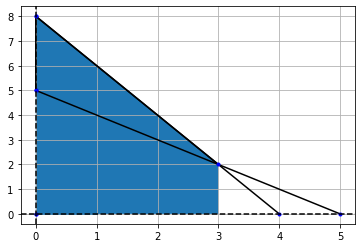

In [4]:
# [x1, y1]
ponto_o = [0, 0] # z = 0
plt.plot(ponto_o)

# Dados retas  

list_values = []
list_values.append([[0, 5], [5, 0]])
list_values.append([[0, 4], [8, 0]])

area_de_solucao = [[0, 0, 3], [5, 8, 2]]
list_values.append(area_de_solucao)


def plot_pontos(x1, x2, color):
  plt.plot(x1, x2, color=color)

for x in list_values:
  plot_pontos(x[0], x[1], color='black')
  plt.plot(x[0], x[1], 'b.')
  
plt.fill_between(area_de_solucao[0], area_de_solucao[1])

plt.plot(ponto_o, ponto_o, 'b.')


plt.grid(True)
plt.axvline(0, c='black', ls='--')
plt.axhline(0, c='black', ls='--')
plt.show()


# Programação

In [5]:
# Definir o modelo
model = pulp.LpProblem('Lista 1 - Exercicio 4', sense=pulp.LpMaximize)

# Adicionar as variáveis
x = pulp.LpVariable.dicts(indices=[1, 2], cat=pulp.LpContinuous, lowBound=0, name='x')

# Adicionar as Restruições
model.addConstraint(x[1] + x[2] >= 5, name='restricao_1')
model.addConstraint(20*x[1] + 10*x[2] <= 80, name='restricao_2')

# Função Objetivo
model.setObjective(30000*x[1] + 10000*x[2])

# Optimizar
model.solve()

# Obter e imprimir a solução
x_sol = {i: x[i].value() for i in [1, 2]}
print(f'x = {x_sol}')
z = 30000*x_sol[1] + 10000*x_sol[2]
print(f'z = {z}')

x = {1: 3.0, 2: 2.0}
z = 110000.0


/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
